In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [51]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
df.shape

(7043, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(0)

First of all, drop customerID column as it is of no use

In [34]:
df.drop('customerID',axis='columns',inplace=True)

In [35]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [37]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].unique()}")
        print("--"*20)

gender: ['Female' 'Male']
----------------------------------------
SeniorCitizen: [0 1]
----------------------------------------
Partner: ['Yes' 'No']
----------------------------------------
Dependents: ['No' 'Yes']
----------------------------------------
PhoneService: ['No' 'Yes']
----------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
----------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport: ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV: ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingMovies: ['No' 'Yes' 'No internet servi

for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].value_counts()}")
        print("--"*20)

In [38]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f"""{col}: {len(df[df[col]==" "])}""")
    print("--"*20)
    

tenure: 0
----------------------------------------
MonthlyCharges: 0
----------------------------------------
TotalCharges: 11
----------------------------------------


In [39]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [40]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [41]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
def plot_distribution(df,column_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y  = df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

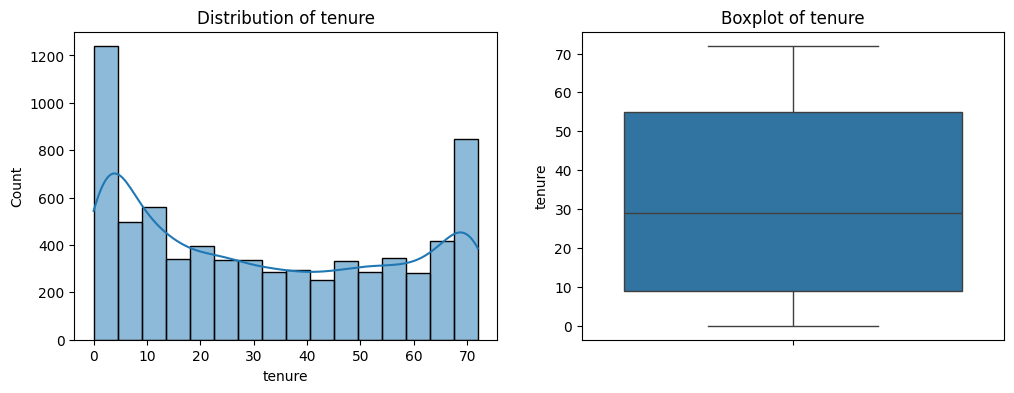

In [24]:
plot_distribution(df, "tenure")

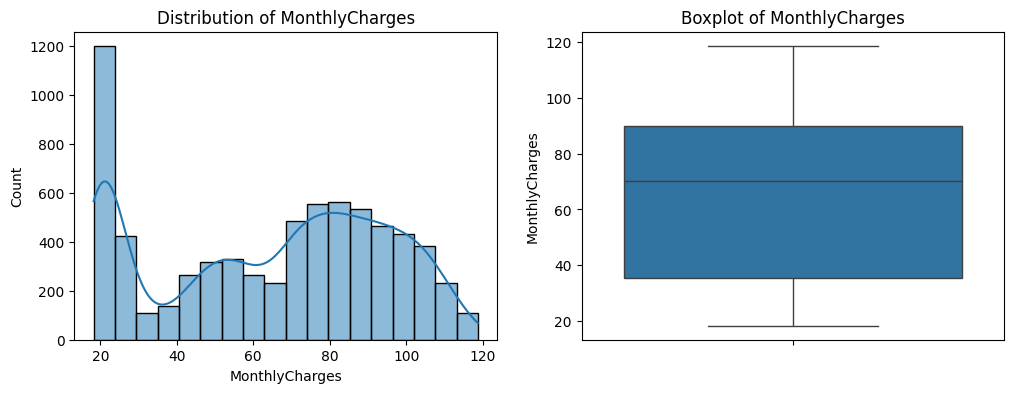

In [25]:
plot_distribution(df, "MonthlyCharges")

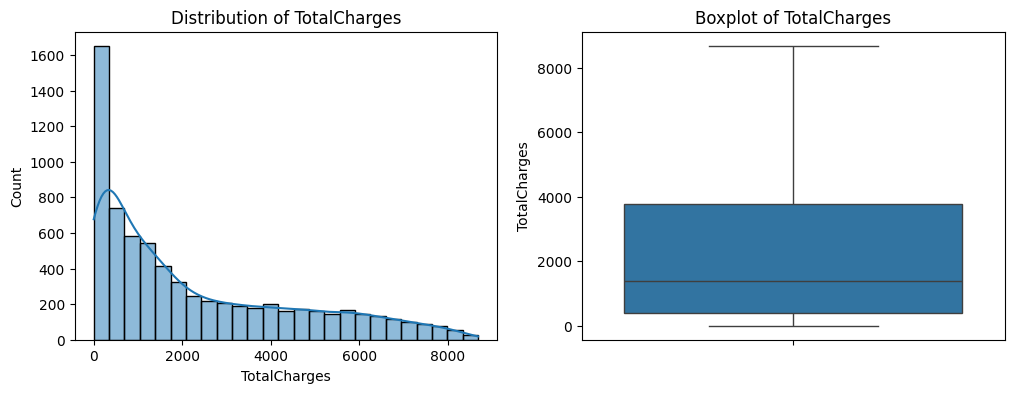

In [26]:
plot_distribution(df, "TotalCharges")

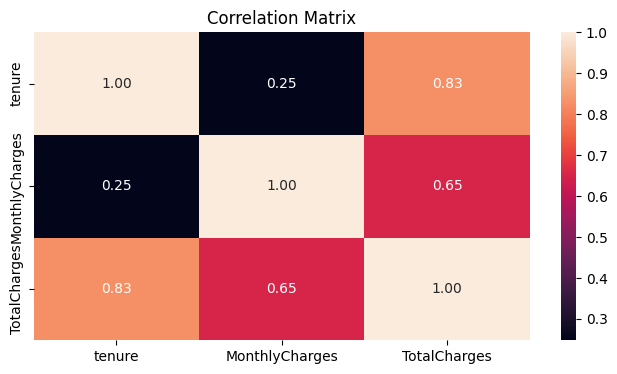

In [27]:
plt.figure(figsize = (8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True,  fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

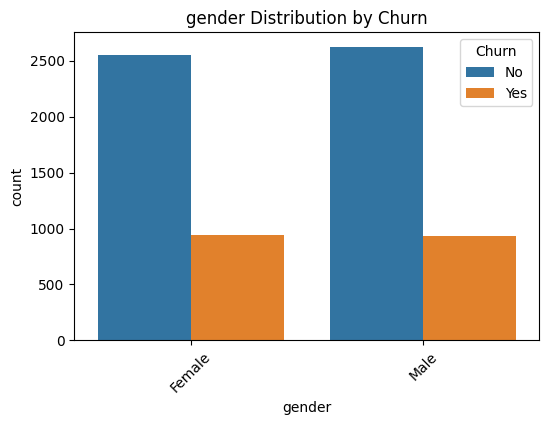

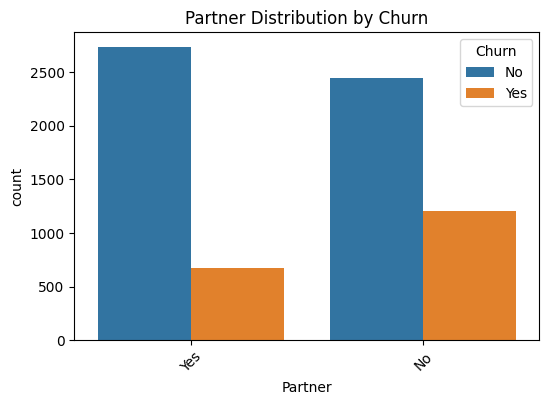

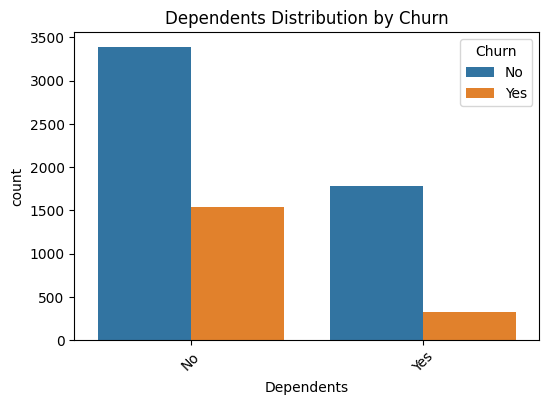

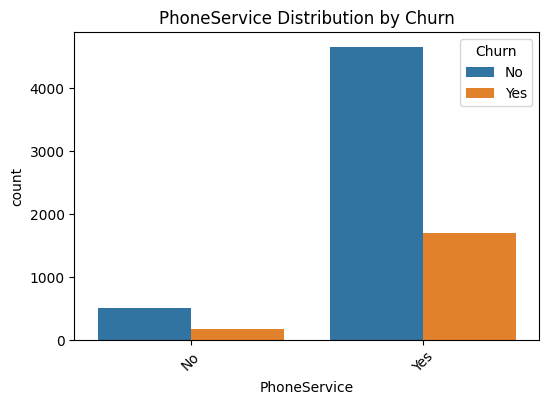

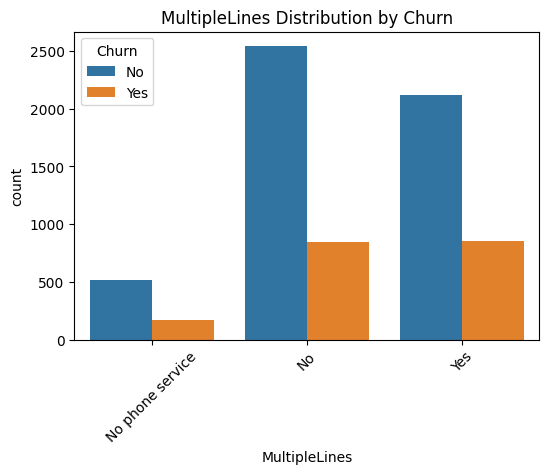

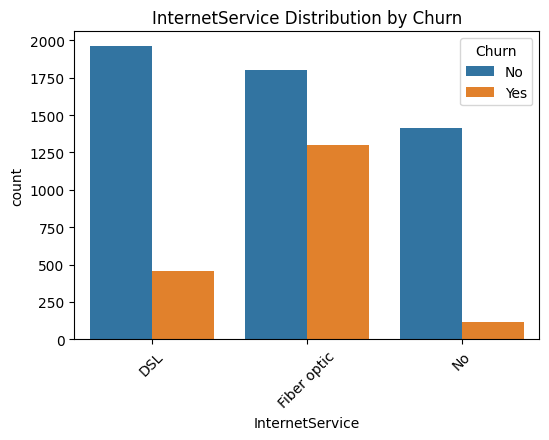

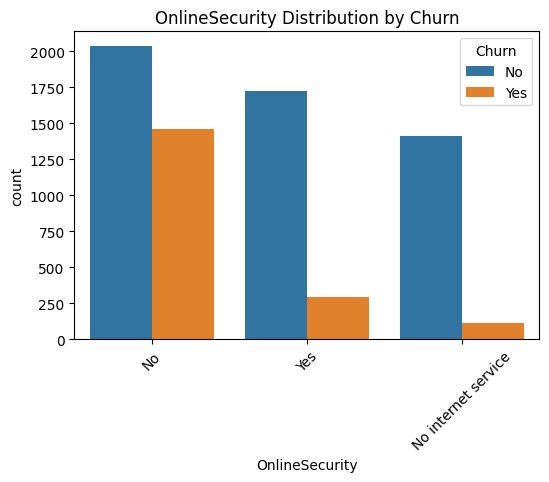

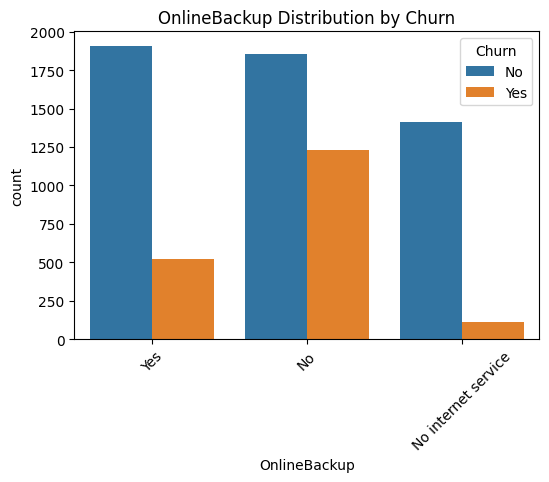

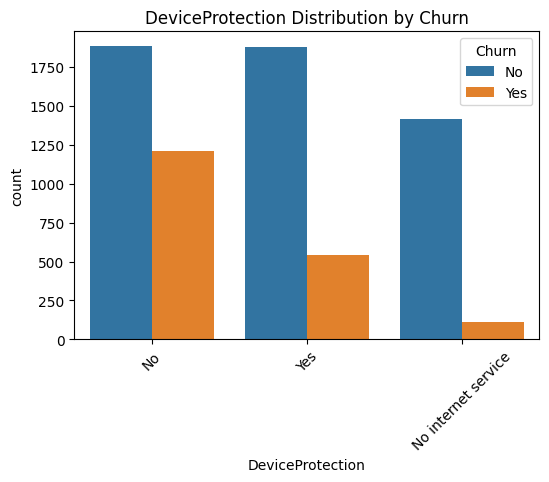

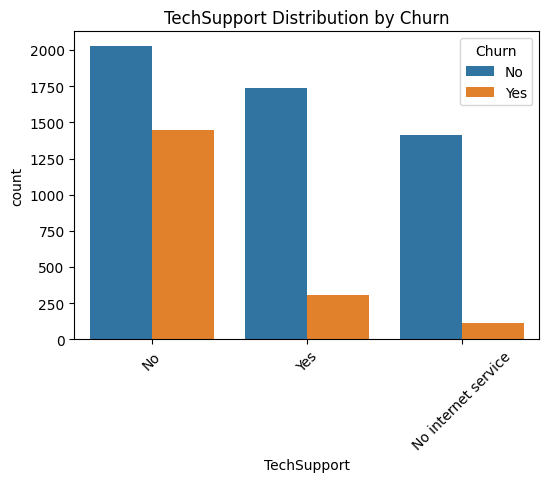

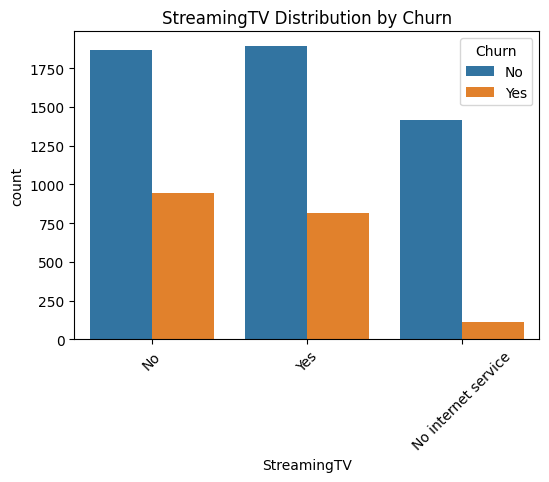

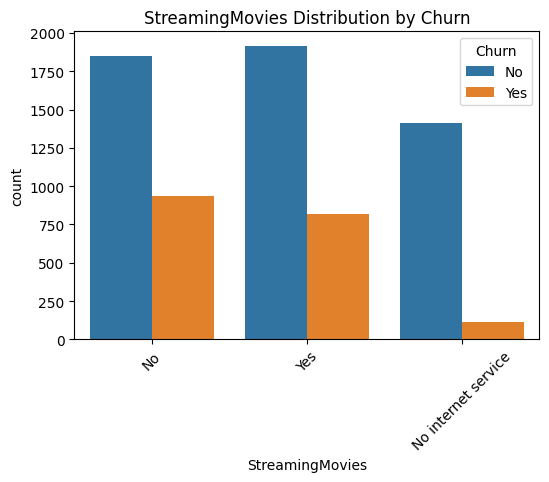

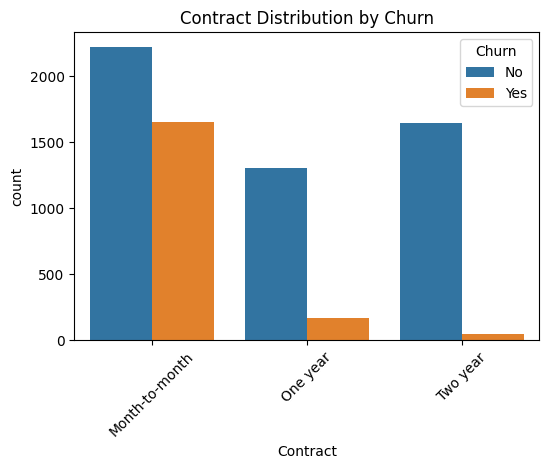

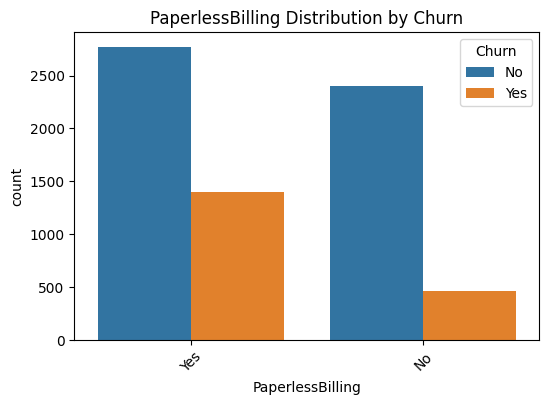

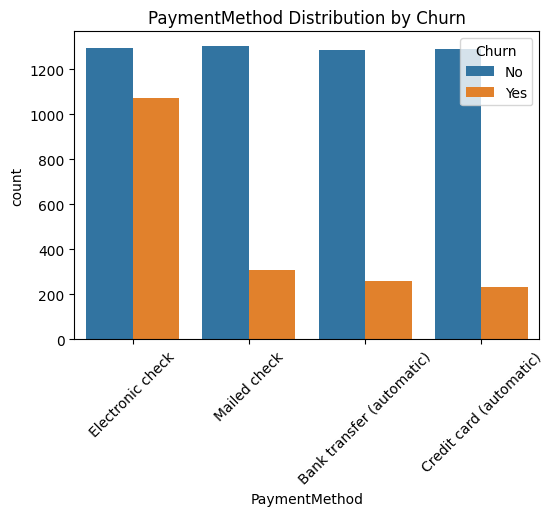

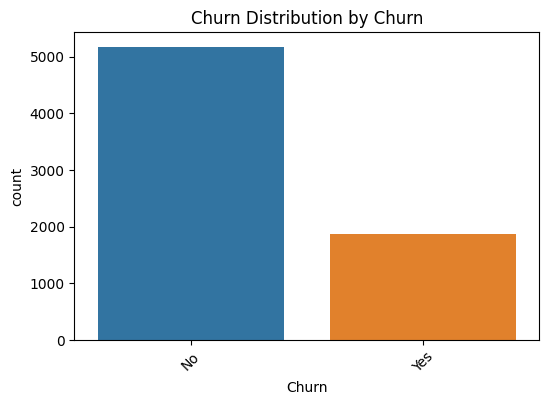

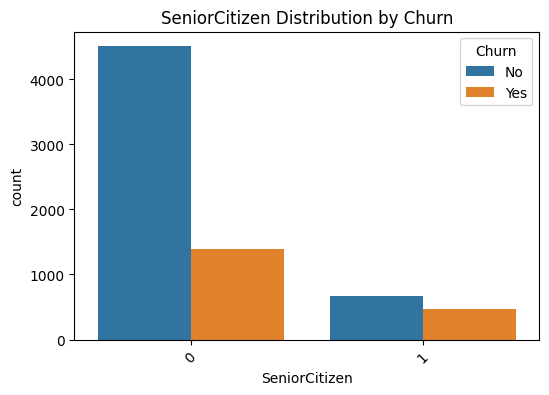

In [28]:
categorical_cols = df.select_dtypes(include = "object").columns.to_list() + ['SeniorCitizen']

for col in categorical_cols:
    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = df[col], hue = 'Churn')
    plt.title(f"{col} Distribution by Churn")
    plt.xticks(rotation=45)
    plt.show()

Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [42]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [43]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].unique()}")
        print("--"*20)

gender: ['Female' 'Male']
----------------------------------------
SeniorCitizen: [0 1]
----------------------------------------
Partner: ['Yes' 'No']
----------------------------------------
Dependents: ['No' 'Yes']
----------------------------------------
PhoneService: ['No' 'Yes']
----------------------------------------
MultipleLines: ['No' 'Yes']
----------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity: ['No' 'Yes']
----------------------------------------
OnlineBackup: ['Yes' 'No']
----------------------------------------
DeviceProtection: ['No' 'Yes']
----------------------------------------
TechSupport: ['No' 'Yes']
----------------------------------------
StreamingTV: ['No' 'Yes']
----------------------------------------
StreamingMovies: ['No' 'Yes']
----------------------------------------
Contract: ['Month-to-month' 'One year' 'Two year']
----------------------------------------
PaperlessBill

Convert Yes and No to 1 or 0

In [44]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']


In [45]:
df[yes_no_col] = df[yes_no_col].replace({'Yes': 1, 'No': 0})


In [47]:
df["gender"]=df["gender"].replace({"Female":0,"Male":1})

In [48]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].unique()}")
        print("--"*20)

gender: [0 1]
----------------------------------------
SeniorCitizen: [0 1]
----------------------------------------
Partner: [1 0]
----------------------------------------
Dependents: [0 1]
----------------------------------------
PhoneService: [0 1]
----------------------------------------
MultipleLines: [0 1]
----------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity: [0 1]
----------------------------------------
OnlineBackup: [1 0]
----------------------------------------
DeviceProtection: [0 1]
----------------------------------------
TechSupport: [0 1]
----------------------------------------
StreamingTV: [0 1]
----------------------------------------
StreamingMovies: [0 1]
----------------------------------------
Contract: ['Month-to-month' 'One year' 'Two year']
----------------------------------------
PaperlessBilling: [1 0]
----------------------------------------
PaymentMethod: ['Electronic ch

In [49]:
objects_columns = df.select_dtypes(include = "object").columns

In [50]:
objects_columns

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

obj_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [39]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for col in objects_columns:
    df[col] = encoder.fit_transform(df[col])


In [40]:
for col in objects_columns:
    print(f'{col}: {df[col].unique()}')

InternetService: [0 1 2]
Contract: [0 1 2]
PaymentMethod: [2 3 0 1]


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [42]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

Here we can see that that catagorical features is imbalanced, for this when we fit any model that is biased towrards 0 . so we need to fix this imbalance , for this we use SMOTE - Synthetic Minority Over-sampling Technique

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

Train test split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [46]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6607,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,25.30,25.30
2598,0,0,0,0,7,1,0,1,0,0,1,0,0,0,0,1,2,75.15,525.00
2345,0,0,0,1,4,1,0,2,0,0,0,0,0,0,0,1,0,20.05,85.50
4093,0,0,0,0,29,1,1,1,0,0,0,0,0,0,0,1,1,76.00,2215.25
693,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,1,1,75.10,270.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,1,2,95.00,95.00
5191,0,0,1,1,23,1,1,0,1,1,1,1,1,1,2,1,1,91.10,2198.30
5226,1,0,1,1,12,1,0,2,0,0,0,0,0,0,0,1,2,21.15,306.05
5390,1,1,0,0,12,1,1,1,0,0,1,0,1,1,0,1,2,99.45,1200.15


In [47]:
y_train

6607    1
2598    0
2345    0
4093    0
693     1
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5282, dtype: int64

In [48]:
y_train.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler
# fit preprocessors on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)   # transform test using the same scaler

In [50]:
# apply SMOTE only on the training set (on scaled features)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [51]:
y_train_smote.value_counts()

Churn
1    3892
0    3892
Name: count, dtype: int64

# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()

In [120]:
penalty=['l1', 'l2', 'elasticnet']
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iter=[100,200,300,500]
c=[1,5,10,100,0.1,0.01,2,3,6]

In [121]:
params=dict(penalty=penalty,C=c,max_iter=max_iter,solver=solver)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 5, 10, 100, 0.1, 0.01, 2, 3, 6],
 'max_iter': [100, 200, 300, 500],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [122]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold


In [123]:
cv=StratifiedKFold()
cv

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [124]:
logistic_grid=GridSearchCV(estimator=logistic_regression_model,param_grid=params,n_jobs=-1,scoring="accuracy",cv=cv)

In [125]:
logistic_grid.fit(X_train_smote,y_train_smote)

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 5, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [126]:
logistic_grid.best_params_

{'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [127]:
logistic_grid.best_score_

np.float64(0.7711988977550593)

In [128]:
logistic_regression_model = LogisticRegression(C= 2, max_iter = 100, penalty = 'l2',solver= 'newton-cg')
logistic_regression_model.fit(X_train_smote,y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,2
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'newton-cg'
,max_iter,100
,multi_class,'deprecated'


In [129]:
y_pred_prob_lr=logistic_regression_model.predict_proba(X_test_scaled)[:,1]
y_pred_prob_lr

array([0.85698615, 0.11570054, 0.00776949, ..., 0.27087148, 0.88122832,
       0.40654639], shape=(1761,))

In [130]:
from sklearn.metrics import roc_curve, roc_auc_score

In [131]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)


In [132]:
auc = roc_auc_score(y_test, y_pred_prob_lr)
print(f"AUC Score: {auc:.3f}")

AUC Score: 0.858


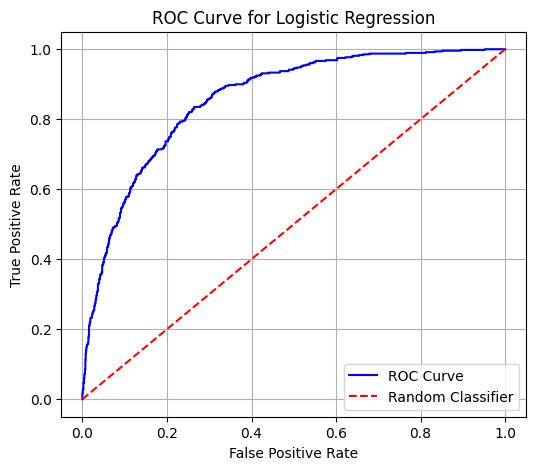

In [133]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# # plot the roc curve for the model
# import numpy as np
# fig = plt.figure(figsize=(20,50))
# plt.plot(fpr, tpr, label=f'ROC Curve')
# plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
# ax = fig.add_subplot(111)
# for xyz in zip(fpr, tpr,thresholds):   
#     ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
# # axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # show the legend
# plt.legend()
# # show the plot
# plt.show()

In [139]:
threshold=0.72
# y_pred_new=[1 if y_pred >threshold else 0 for y_pred in y_pred_prob ]
y_pred_new=(y_pred_prob_lr>threshold).astype(int)

In [140]:
y_pred_new

array([1, 0, 0, ..., 0, 1, 0], shape=(1761,))

In [141]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [142]:
# Evaluate
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

[[1137  145]
 [ 195  284]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1282
           1       0.66      0.59      0.63       479

    accuracy                           0.81      1761
   macro avg       0.76      0.74      0.75      1761
weighted avg       0.80      0.81      0.80      1761



In [106]:
import pickle

# Save the model
with open("Logistic_churn_model.pkl", "wb") as f:
    pickle.dump(logistic_regression_model, f)

# Load the model
# with open("logistic_churn_model.pkl", "rb") as f:
#     loaded_rf = pickle.load(f)

# y_pred = loaded_rf.predict(X_test)


# Random Forest

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [88]:
# Base model
random_forest = RandomForestClassifier(
    class_weight='balanced',
    bootstrap=True,   # Required for OOB
    oob_score=True,   # Enable OOB scoring
    random_state=42
)

parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [200, 300, 400, 500],        # More trees → more stability
    'max_depth': [10, 15, 20, 25],               # Slightly shallower trees
    'min_samples_split': [5, 8, 10, 12],         # Require more samples to split
    'min_samples_leaf': [2, 3, 4, 5],            # Minimum samples per leaf
    'max_features': ['sqrt', 'log2']             # Common feature sampling strategies
}



In [89]:
# RandomizedSearchCV
random_forest_cv = RandomizedSearchCV(
    random_forest,
    parameter,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit the model
random_forest_cv.fit(X_train_smote, y_train_smote)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [10, 15, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [2, 3, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [90]:
# Refit best model and check OOB score
best_rf = random_forest_cv.best_estimator_
print("OOB Score:", best_rf.oob_score_)

OOB Score: 0.8493062692702981


In [91]:
random_forest_cv.best_params_


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'gini'}

In [92]:
random_forest = RandomForestClassifier(criterion="gini",max_depth = 25,min_samples_leaf = 3, min_samples_split= 5, n_estimators = 400,max_features="log2",n_jobs=-1)
random_forest.fit(X_train_smote,y_train_smote)

,n_estimators,400
,criterion,'gini'
,max_depth,25
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [93]:
y_pred_prob_rf=random_forest.predict_proba(X_test_scaled)[:,1]
y_pred_prob_rf

array([0.77124884, 0.18652219, 0.00974469, ..., 0.13046202, 0.93615791,
       0.5856228 ], shape=(1761,))

In [94]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [95]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

In [96]:
auc = roc_auc_score(y_test, y_pred_prob_rf)
print(f"AUC Score: {auc:.3f}")

AUC Score: 0.851


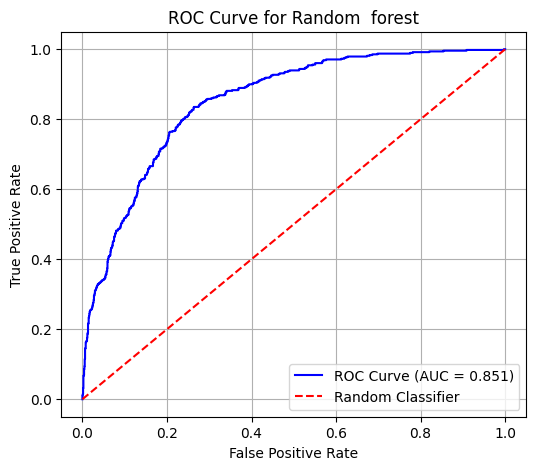

In [97]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title('ROC Curve for Random  forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
threshold=0.77
# y_pred_new=[1 if y_pred >threshold else 0 for y_pred in y_pred_prob ]
y_pred_new_rf=(y_pred_prob_rf>=threshold).astype(int)

In [116]:
y_pred_new_rf

array([1, 0, 0, ..., 0, 1, 0], shape=(1761,))

In [117]:
random_forest_acc = accuracy_score(y_test,y_pred_new_rf)
random_forest_acc

0.7898921067575241

In [118]:
random_forest_classification_report = classification_report(y_test,y_pred_new_rf)
print(random_forest_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1282
           1       0.78      0.32      0.45       479

    accuracy                           0.79      1761
   macro avg       0.79      0.64      0.66      1761
weighted avg       0.79      0.79      0.76      1761



In [143]:
import pickle

# Save the model
with open("random_forest_churn_model.pkl", "wb") as f:
    pickle.dump(random_forest, f)

# # Load the model
# with open("random_forest_churn_model.pkl", "rb") as f:
#     loaded_rf = pickle.load(f)

# y_pred = loaded_rf.predict(X_test)


# XGBoost

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
from xgboost import XGBClassifier

In [146]:
xgb_model=XGBClassifier()

In [157]:
xgboost_params = {
    "learning_rate": [0.3, 0.1, 0.05, 0.01],     # step size shrinkage
    "max_depth": [3, 5, 8, 12, 20],              # controls tree complexity
    "n_estimators": [100, 200, 300, 500],        # number of boosting rounds
    "colsample_bytree": [0.3, 0.5, 0.7, 0.9, 1], # feature sampling per tree
}


In [158]:
xgboost_cv=RandomizedSearchCV(estimator=xgb_model,param_distributions=xgboost_params,cv=5, scoring='accuracy')
xgboost_cv.fit(X_train_smote,y_train_smote)


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.3, 0.5, ...], 'learning_rate': [0.3, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [162]:
print(xgboost_cv.best_params_)

{'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.01, 'colsample_bytree': 0.5}


In [163]:
print(xgboost_cv.best_score_)

0.84764377807827


In [164]:
xgb_model = XGBClassifier(
    colsample_bytree=0.3,
    learning_rate=0.01,
    max_depth=12,
    n_estimators=100,
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.3
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred_prob_xg=xgb_model.predict_proba(X_test_scaled)[:,1]
y_pred_prob_xg

In [179]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xg)

In [180]:
auc = roc_auc_score(y_test, y_pred_prob_xg)
print(f"AUC Score: {auc:.3f}")

AUC Score: 0.855


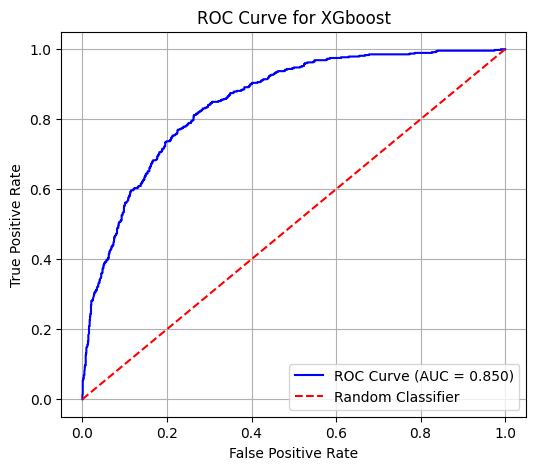

In [233]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title('ROC Curve for XGboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [192]:
threshold=0.60
# y_pred_new=[1 if y_pred >threshold else 0 for y_pred in y_pred_prob ]
y_pred_new_xg=(y_pred_prob_xg>=threshold).astype(int)

In [193]:
xgboost_acc = accuracy_score(y_test,y_pred_new_xg)
xgboost_acc

0.7825099375354913

In [194]:
Xgboost_classification_report = classification_report(y_test,y_pred_new_xg)
print(Xgboost_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1282
           1       0.71      0.34      0.46       479

    accuracy                           0.78      1761
   macro avg       0.75      0.64      0.66      1761
weighted avg       0.77      0.78      0.75      1761



In [195]:
import pickle

# Save the model
with open("xgboost_churn_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# # Load the model later
# with open("xgboost_churn_model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

# y_pred = loaded_model.predict(X_test)


# AdaBoost 

In [196]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [198]:
# Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create AdaBoost classifier
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define parameter grid
parameter = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

# Perform Grid Search
adaboost_grid = RandomizedSearchCV(adaboost, parameter, cv=5, n_jobs=-1)
adaboost_grid.fit(X_train_smote, y_train_smote)

,estimator,AdaBoostClass...ndom_state=42)
,param_distributions,"{'estimator__max_depth': [1, 2, ...], 'learning_rate': [0.01, 0.1, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [199]:
# Best parameters
print("Best Parameters:", adaboost_grid.best_params_)
print("Best Score:", adaboost_grid.best_score_)

Best Parameters: {'n_estimators': 300, 'learning_rate': 1.0, 'estimator__max_depth': 2}
Best Score: 0.8288868746006509


In [200]:
# Get best parameters
best_params = adaboost_grid.best_params_

# Train final model with best parameters
base_estimator_final = DecisionTreeClassifier(max_depth=best_params['estimator__max_depth'])
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator_final,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)
adaboost_model.fit(X_train_smote, y_train_smote)

,estimator,DecisionTreeC...r(max_depth=2)
,n_estimators,300
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [204]:
# Make predictions
adaboost_y_pred = adaboost_model.predict_proba(X_test_scaled)[:,1]
adaboost_y_pred

array([0.53324317, 0.46577635, 0.37182576, ..., 0.44390641, 0.54617084,
       0.48188497], shape=(1761,))

In [205]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost_y_pred)

In [219]:
auc = roc_auc_score(y_test, adaboost_y_pred)
print(f"AUC Score: {auc:.3f}")

AUC Score: 0.850


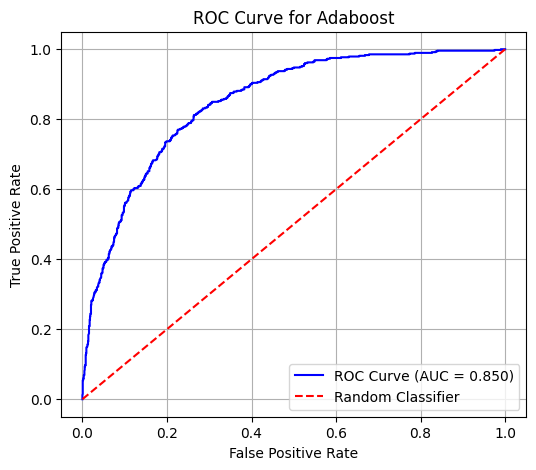

In [234]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title('ROC Curve for Adaboost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
threshold=0.50
# y_pred_new=[1 if y_pred >threshold else 0 for y_pred in y_pred_prob ]
y_pred_new_ada=(adaboost_y_pred>=threshold).astype(int)

In [231]:
adaboost_acc = accuracy_score(y_test,y_pred_new_ada)
adaboost_acc

0.7876206700738216

In [232]:
Xgboost_classification_report = classification_report(y_test,y_pred_new_ada)
print(Xgboost_classification_report)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1282
           1       0.59      0.69      0.64       479

    accuracy                           0.79      1761
   macro avg       0.74      0.76      0.74      1761
weighted avg       0.80      0.79      0.79      1761



In [ ]:
# from sklearn.metrics import accuracy_score, classification_report

# # Calculate accuracy
# adaboost_acc = accuracy_score(y_test, adaboost_y_pred)
# print(f"AdaBoost Accuracy: {adaboost_acc:.4f}")

AdaBoost Accuracy: 0.7893


In [ ]:
# # Classification Report
# adaboost_classification_report = classification_report(y_test, adaboost_y_pred)
# print("\nClassification Report:")
# print(adaboost_classification_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1282
           1       0.60      0.65      0.63       479

    accuracy                           0.79      1761
   macro avg       0.74      0.75      0.74      1761
weighted avg       0.80      0.79      0.79      1761



In [55]:
import pickle

# Save the model
with open('adaboost_model.pkl', 'wb') as file:
    pickle.dump(adaboost_model, file)

print("✓ AdaBoost model saved successfully as 'adaboost_model.pkl'")

✓ AdaBoost model saved successfully as 'adaboost_model.pkl'


# SVM

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Create SVM classifier
svm = SVC(random_state=42, probability=True)

# Define parameter grid (similar to your original one)
parameter = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # Only for poly kernel
}

# Perform Randomized Search
svm_random = RandomizedSearchCV(svm, parameter, n_iter=20, cv=5, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)
svm_random.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,SVC(probabili...ndom_state=42)
,param_distributions,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf', ...]}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [59]:
# Best parameters
print("Best Parameters:", svm_random.best_params_)
print("Best Score:", svm_random.best_score_)

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 3, 'C': 10}
Best Score: 0.8403171348235764


In [60]:
# Get best parameters
best_params = svm_random.best_params_

# Train final model with best parameters
svm_model = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    gamma=best_params['gamma'],
    degree=best_params.get('degree', 3),  # Use default if not in best_params
    probability=True,
    random_state=42
)
svm_model.fit(X_train_smote, y_train_smote)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [61]:
# Make predictions
svm_y_pred = svm_model.predict(X_test_scaled)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
svm_acc = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_acc:.4f}")

SVM Accuracy: 0.7376


In [63]:
# Classification Report
svm_classification_report = classification_report(y_test, svm_y_pred)
print("\nClassification Report:")
print(svm_classification_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1282
           1       0.52      0.61      0.56       479

    accuracy                           0.74      1761
   macro avg       0.68      0.70      0.69      1761
weighted avg       0.75      0.74      0.74      1761



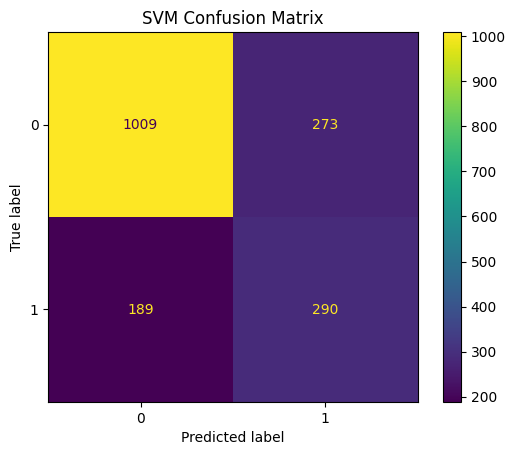

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred)
plt.title('SVM Confusion Matrix')
plt.show()

In [65]:
import pickle

# Save the model
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

print("✓ SVM model saved successfully as 'svm_model.pkl'")

✓ SVM model saved successfully as 'svm_model.pkl'


# Stacking

In [136]:
from sklearn.ensemble import StackingClassifier

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier

In [177]:
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=400,
        max_depth=20,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features="sqrt",
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )),

    ('logistic', LogisticRegression(
        C=3,
        max_iter=300,
        solver='lbfgs',
        penalty='l2',
        class_weight='balanced',
        random_state=42
    )),

    ("xgb", XGBClassifier(
        colsample_bytree=0.5,
        subsample=0.8,
        learning_rate=0.05,
        max_depth=6,
        n_estimators=400,
        reg_lambda=2,
        reg_alpha=0.5,
        scale_pos_weight=2,  # handle imbalance
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    )),

    ("svm", SVC(
        C=3,
        kernel="rbf",
        gamma='scale',
        probability=True,
        class_weight='balanced',
        random_state=42
    ))
]

In [197]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(
        C=2,
        max_iter=500,
        solver='lbfgs',
        penalty='l2',
        random_state=42
    ),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

In [198]:
final_model = clf.fit(X_train_smote,y_train_smote)

In [199]:
final_model

,estimators,"[('rf', ...), ('logistic', ...), ...]"
,final_estimator,LogisticRegre...ndom_state=42)
,cv,StratifiedKFo... shuffle=True)
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,n_estimators,400
,criterion,'gini'
,max_depth,20
,min_samples_split,4


In [200]:
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]


In [201]:
from sklearn.metrics import roc_curve, roc_auc_score

In [202]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

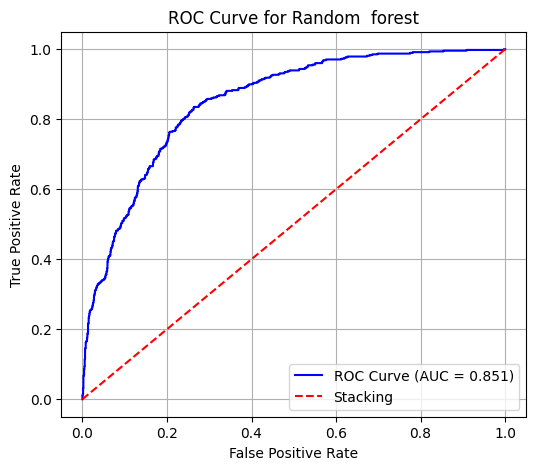

In [203]:
# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Stacking')
plt.title('ROC Curve for Random  forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [223]:
threshold=0.70

y_pred_stack=(y_pred_proba>=threshold).astype(int)

In [224]:
stack_acc = accuracy_score(y_test,y_pred_stack)
stack_acc

0.7910278250993753

In [225]:
stack_classification_report = classification_report(y_test,y_pred_stack)
print(stack_classification_report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1282
           1       0.67      0.46      0.55       479

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761



In [161]:
y_pred_final=final_model.predict(X_test_scaled)
y_pred_final

array([1, 0, 0, ..., 0, 1, 1], shape=(1761,))

In [162]:
from sklearn.metrics import accuracy_score, classification_report

In [163]:
stacking_report = accuracy_score(y_test,y_pred_final)
print(stacking_report)

0.7955706984667802


In [164]:
stacking_classification_report = classification_report(y_test,y_pred_final)
print(stacking_classification_report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1282
           1       0.64      0.56      0.60       479

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



# ANN

In [1]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [70]:
model = Sequential([
    Dense(100, input_shape=(X_train_smote.shape[1],)),
    LeakyReLU(alpha=0.1),
    # Dropout(0.3),  # dropout after activation

    Dense(70),
    LeakyReLU(alpha=0.1),
    # Dropout(0.2),  # another dropout

    Dense(50),
    LeakyReLU(alpha=0.1),

    Dense(25),
    LeakyReLU(alpha=0.1),

    Dense(10),
    LeakyReLU(alpha=0.1),

    Dense(1, activation='sigmoid')  # output layer, no dropout
])

In [71]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 70)             │         7,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,166 (55.34 KB)

 Trainable params: 14,166 (55.34 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
earlystopper = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0002,        # minimum change to qualify as improvement
    patience=10,             
    mode='auto',
    verbose=1,
    restore_best_weights=True
)

reducelr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,             # reduce LR by half
    patience=5,             # wait 1 epoch before reducing
    verbose=1,
    min_delta=0.0002
)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_smote, 
    y_train_smote.values.reshape((-1,1)),  # reshape for keras compatibility
    epochs=1000,
    validation_data=(X_test_scaled, y_test),  # ✅ FIXED here
    batch_size=50,
    shuffle=True,
    callbacks=[earlystopper, reducelr],
    verbose=1
)


Epoch 1/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7482 - loss: 0.5224 - val_accuracy: 0.7655 - val_loss: 0.4709 - learning_rate: 5.0000e-04
Epoch 2/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7847 - loss: 0.4636 - val_accuracy: 0.7592 - val_loss: 0.4878 - learning_rate: 5.0000e-04
Epoch 3/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7905 - loss: 0.4480 - val_accuracy: 0.7717 - val_loss: 0.4742 - learning_rate: 5.0000e-04
Epoch 4/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7946 - loss: 0.4379 - val_accuracy: 0.7524 - val_loss: 0.5113 - learning_rate: 5.0000e-04
Epoch 5/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4284 - val_accuracy: 0.7734 - val_loss: 0.4699 - learning_rate: 5.0000e-04
Epoch 6/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.4174 - val_accuracy: 0.7712 - val_loss: 0.4697 - learning_rate: 5.0000e-04
Epoch 7/1000
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [73]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7734


In [74]:
from sklearn.metrics import accuracy_score,classification_report

In [78]:
# Make predictions
ANN_predict_y = model.predict(X_test_scaled)

# Convert probabilities to 0/1 class
ANN_predict_y_class = (ANN_predict_y > 0.5).astype(int)

# Calculate accuracy
from sklearn.metrics import accuracy_score
random_forest_acc = accuracy_score(ANN_predict_y_class, y_test.values.ravel())  # ensure same shape
print(f"Accuracy: {random_forest_acc:.4f}")


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.7734


In [79]:
# Generate classification report
random_forest_classification_report = classification_report(
    ANN_predict_y_class, 
    y_test.values.ravel()  # ensure shape matches
)

print(random_forest_classification_report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1107
           1       0.77      0.56      0.65       654

    accuracy                           0.77      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.77      0.77      0.76      1761



In [80]:
model.save('model.h5')

In [10]:
model={"a":30,"b":20}

In [11]:
list(model)

['a', 'b']

In [12]:
sorted(model.values())

[20, 30]